
**Domain**: Real Estate

**Problem Statement**: You are provided with a housing dataset that contains information about different houses in Boston. As a data scientist, you are asked to predict the price of the house by analyzing the entire dataset.

**Dataset used**: Boston House Dataset

**Dataset description**: This data was originally a part of the UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features:

* **CRIM**: Per capita crime rate by town

* **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

* **INDUS**: Proportion of non-retail business acres per town

* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* **NOX**: Nitric oxide concentration (parts per 10 million)

* **RM**: Average number of rooms per dwelling

* **AGE**: Proportion of owner-occupied units built prior to 1940

* **DIS**: Weighted distances to five Boston employment centers

* **RAD**: Index of accessibility to radial highways

* **TAX**: Full-value property tax rate per $10,000

* **PTRATIO**: Pupil-teacher ratio by town

* **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

* **LSTAT**: Percentage of the lower status of the population

* **MEDV**: Median value of owner-occupied homes in $1000s

**Tasks to be performed**: 

* Importing Required Libraries
* Loading the Dataset
* Analyzing and Preparing the Dataset
* Visualizing the Dataset
* Splitting the data into training and testing
* Implementing **Simple Linear Regression**
* Implementing **Multiple Linear Regression**
* Implementing **Polynomial Regression**
* Implementing **Ridge and Lasso Regression**

**Hint**: If the model accuracy is below 80%, it means you need to reclean, reanalyze and retrain your model. 

**Importing Required Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
import warnings
warnings.filterwarnings("ignore")

**Loading the Datset**

In [0]:
boston = load_boston()

**Analyzing the Dataset**

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Converting the dataset into Pandas DataFrame**

In [8]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['medv']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
medv       float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
dtype: int64

**Visualizing the Dataset**

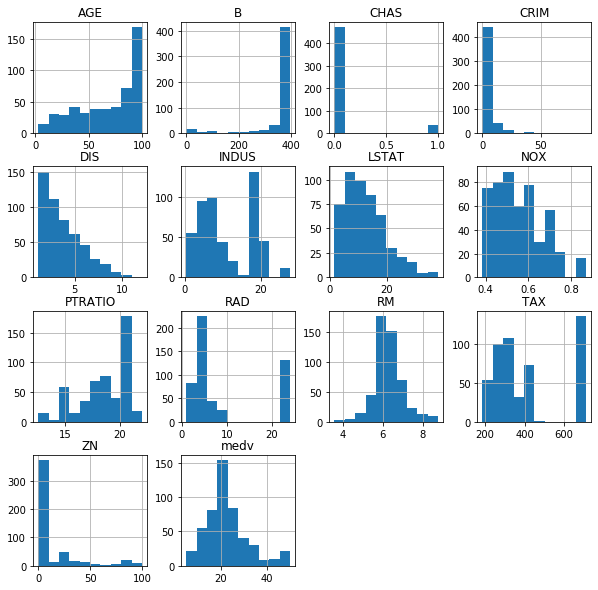

In [14]:
df.hist(figsize=(10,10))
plt.show()

**From above, you can see the distribution of all the features present in the dataset**

**Let us take a look at the spread of our dataset**


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**It seems some features are having outlier values, like values in CRIM is going as high as 88.97 where as the median('50%') is 0.25 and max value in LSTAT is 37 as compared to median 11.These high values might be outliers**

**Outliers are extreme values, which can affect our model, so we need to remove them**

**Visualizing the data using Box Plot to identify the outliers**

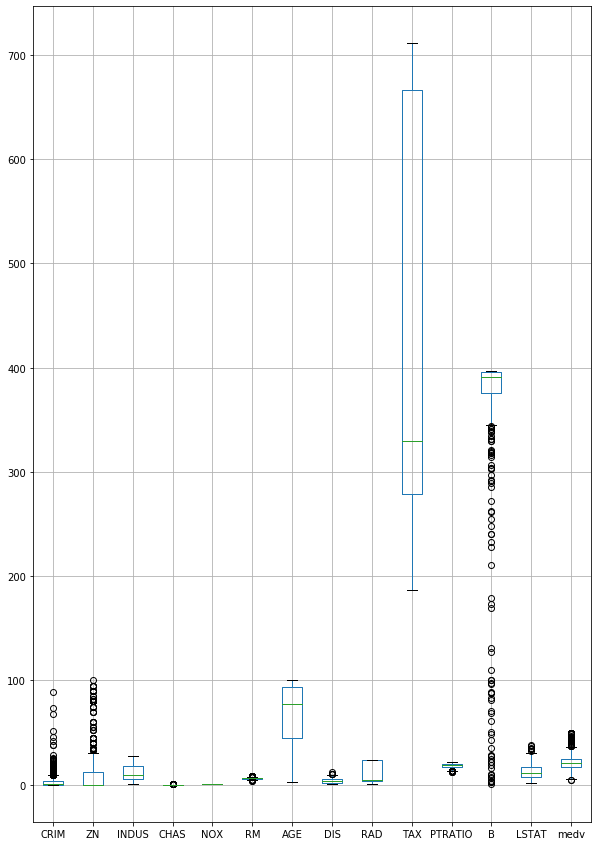

In [17]:
df.boxplot(figsize=(10,15))
plt.show()

**From above, we can see that CRIM, ZN, B, and LSTAT are having several Outliers**

**Normal Distribution Curve - Before Removing Outliers**

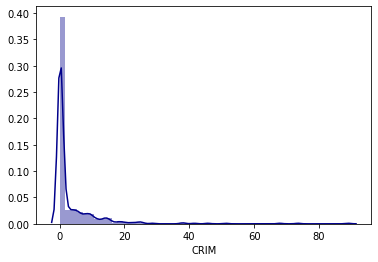

In [18]:
sns.distplot(df['CRIM'], hist=True, kde=True, color = 'darkblue')

**From above, you can see that there are very less number of samples having ZN value between 80 and 100. They seem to be outlier values**

In [0]:
for col in ['CRIM','ZN','TAX','INDUS','RAD','B','LSTAT']:
    percentiles = df[col].quantile([0.01,0.99]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

**From above, you can see that the outliers have been clipped using the numpy's clip function**

**Normal Distribution Curve after Removing Outliers**

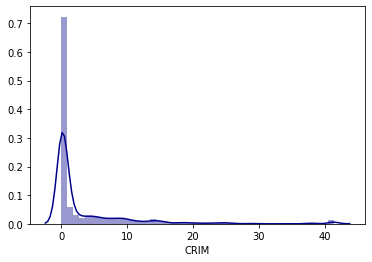

In [20]:
sns.distplot(df['CRIM'], hist=True, kde=True, color = 'darkblue')

In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,407.794466,18.455534,356.715751,12.642073,22.532806
std,6.908970,23.112644,6.809112,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,167.791388,2.164946,91.133441,7.074084,9.197104
min,0.013610,0.000000,1.253500,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,6.730000,2.883000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,33.918500,50.000000


In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,407.794466,18.455534,356.715751,12.642073,22.532806
std,6.908970,23.112644,6.809112,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,167.791388,2.164946,91.133441,7.074084,9.197104
min,0.013610,0.000000,1.253500,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,6.730000,2.883000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,33.918500,50.000000


**Let us split the data for training and testing**

We are using **train_test_split** method from **sklearn.model_selection**, which shuffles and split the dataset into training and testing, where the first argument contains the independent features and the second argument contains the dependent feature(i.e. Outcome), the **test_size** is 30% of the original dataset and the **random_state** is being used by the random no. generator, which prevents shuffling of the instances each time we run the code.

In [0]:
x=df[['RM']]
y=df[['medv']]

#Splitting the dataset into 70/30 Ratio
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

**Implementing Simple Linear Regression**

In [69]:
lr = LinearRegression() 
lr.fit(X_train, y_train)

#Print Intercept Value
print("Intercept: ", lr.intercept_)

#Print Linear Coefficient
print("Coefficients :: ",lr.coef_)

y_pred = lr.predict(X_test) 


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Intercept:  [-34.66230744]
Coefficients ::  [[9.1181022]]
(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [70]:
print("Predicted values:\n", y_pred[:4])
print("Actual values:\n", y[:4])


Predicted values:
 [[23.83943626]
 [26.95782721]
 [19.89129801]
 [20.63898239]]
Actual values:
    medv
0  24.0
1  21.6
2  34.7
3  33.4


In [25]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test ,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test ,y_pred))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:",metrics.explained_variance_score(y_test, y_pred))
print("R2_Score: %2f" %r2_score(y_test ,y_pred))


Mean Absolute Error: 4.314224104076755
Mean Squared Error: 40.35144969787305
Root Mean Square Error: 6.352279094771659
Explained Variance Score: 0.46022631007164083
R2_Score: 0.458465


**From above, you can see different Regression Metrics such as MAE, MSE, etc**

* **Mean Absolute Error:** It is the average of the difference between the Original Values and the Predicted Values 

* **Mean Squared Error:** It takes the average of the square of the difference between the original values and the predicted values

* **RMSE:** It is a very popular metric to evaluate a model. It is similar to Mean Squared Error, however, we just take the square root of the result of MSE

* **R2_Score:** It is the coefficient of determination.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

**Note**: If you want to learn more about the Regression Metrics [Click Here](https://scikit-learn.org/stable/modules/model_evaluation.html)

**Adjusted R-Squared**

When we add new features to the model, the R-Squared Value either increases or remains the same. R-Squared does not change for adding features that add no value to the model. An improved version of R-Squared is the Adjusted R-Squared. 

In [0]:
def AdjustedRSquare(lr,x,y):
  Ybat = lr.predict(x)
  n,k = x.shape
  sse=np.sum(np.square(Ybat-y),axis=0)
  sst=np.sum(np.square(y-np.mean(y)),axis=0)
  R2 = 1-sse/sst
  adjR2= R2 - (1-R2)*(float(k)/(n-k-1))
  return adjR2,R2
  

In [27]:
lr.adjR2, lr.R2 = AdjustedRSquare(lr,X_train,y_train)
print(lr.adjR2, lr.R2)

medv    0.486434
dtype: float64 medv    0.487889
dtype: float64


**Implementing Multiple Linear Regression**

In [0]:
x=df.iloc[:, :13]
y=df[['medv']]

#Splitting the dataset into 70/30 Ratio
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

lr = LinearRegression(normalize=True) 
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test) 


In [63]:
print("Predicted values:\n", y_pred[:4])
print("Actual values:\n", y[:4])


Predicted values:
 [[28.70063702]
 [36.53973361]
 [15.5401217 ]
 [25.40288581]]
Actual values:
    medv
0  24.0
1  21.6
2  34.7
3  33.4


In [64]:
print("MAE_Score:",metrics.mean_absolute_error(y_test ,y_pred))
print("MSE_Score:",metrics.mean_squared_error(y_test ,y_pred))
print("Explained Variance",metrics.explained_variance_score(y_test, y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE_Score: 3.1513288727936875
MSE_Score: 21.22240619190844
Explained Variance 0.7152660422397425
RMSE 4.606778287687442


In [65]:
print(lr.score(X_train,y_train)) # R Square Value from the trained model
print(lr.score(X_test,y_test)) # R Square value from the test set

0.7426056268089254
0.7151855518795494


In [66]:
lr.adjR2, lr.R2 = AdjustedRSquare(lr,X_train,y_train)
print(lr.adjR2, lr.R2)

medv    0.732764
dtype: float64 medv    0.742606
dtype: float64


**Re-analysing the prepared data for selecting important features**

Let us visualise the correlation. Correlation lies between -1 to 1, where values near to 1 shows high positive correlation and values near -1 shows high negative correlation. Visualising the correlation helps us in selecting important features for prediction,as the feautures having low correlation with the dependent variable can be dropped as they are not effecting the predictions.

This feature selection enhance our modelling, as training the model becomes faster since we have reduced the size of the data, and now our model are less prone to overfit.


In [32]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
CRIM,1.000000,-0.233594,0.475860,-0.060170,0.488860,-0.270109,0.404499,-0.435493,0.721364,0.676877,0.333114,-0.438922,0.530853,-0.432679
ZN,-0.233594,1.000000,-0.536485,-0.042384,-0.518085,0.311213,-0.571114,0.666488,-0.313141,-0.315741,-0.391844,0.176215,-0.415929,0.359325
INDUS,0.475860,-0.536485,1.000000,0.064179,0.767492,-0.391012,0.646345,-0.709959,0.601249,0.717923,0.383282,-0.360067,0.607869,-0.483373
CHAS,-0.060170,-0.042384,0.064179,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035025,-0.121515,0.048750,-0.052955,0.175260
NOX,0.488860,-0.518085,0.767492,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.669733,0.188933,-0.380340,0.593863,-0.427321
RM,-0.270109,0.311213,-0.391012,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.290696,-0.355501,0.128194,-0.611228,0.695360
AGE,0.404499,-0.571114,0.646345,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506270,0.261515,-0.273711,0.605316,-0.376955
DIS,-0.435493,0.666488,-0.709959,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534339,-0.232471,0.291663,-0.499092,0.249929
RAD,0.721364,-0.313141,0.601249,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.915960,0.464741,-0.444439,0.488911,-0.381626
TAX,0.676877,-0.315741,0.717923,-0.035025,0.669733,-0.290696,0.506270,-0.534339,0.915960,1.000000,0.460876,-0.444205,0.544563,-0.467799


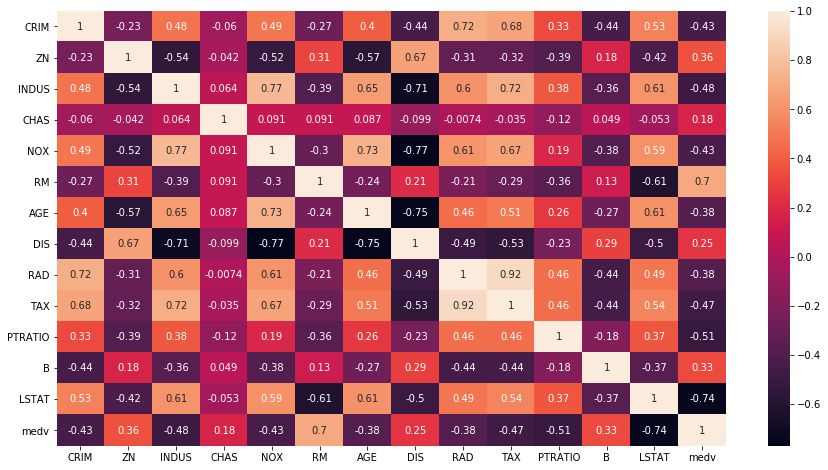

In [33]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(corr, annot = True)
plt.show()

**From the above heatmap we can easily tell that the LSTAT feature has a very high correlation with the target variable.**

Also, if 2 independent features show high correlation, we can just keep one of them as both are revealing same type of information, for ex, in the above heatmap we can see that Age and DIS are showing high correlation. So we can just use the Age column and leave the DIS column.

**Applying Polynomial Regression on Boston Housing Datset**

In [0]:
x=df[['CRIM','ZN','AGE','NOX','CHAS','RM','RAD','TAX','PTRATIO','B']]
y=df[['medv']]


poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(x)

In [35]:
slm_poly = LinearRegression()
slm_poly.fit(X_poly, y)
print("Coefficient:", slm_poly.coef_,"\nIntercept:", slm_poly.intercept_)


Coefficient: [[ 1.81798070e+08 -1.31983001e+01  7.10685090e-02  2.53092341e-01
   3.22217979e+02  3.90552192e+01  6.20805146e-01  7.35300120e+00
  -3.30591204e-01  4.85889965e+00  1.06180234e-01  1.38095915e-02
   2.34748629e-02 -6.71770524e-03 -2.92444680e+00  2.79777123e+00
   8.62446533e-02 -7.94090901e-01  4.81161653e-02  7.43233691e-02
  -3.82056879e-04 -1.02591652e-04 -4.60691335e-04 -8.05818282e-01
  -8.43755420e-02  5.74871400e-03 -1.16633175e-02  2.32540378e-04
  -4.44930094e-04  6.16617506e-04 -7.89697358e-05 -3.22852369e-01
  -3.39902069e-02 -9.53587133e-03  1.81528113e-02 -5.89846061e-04
   8.44458311e-03 -3.94645742e-04 -1.31585231e+02 -8.40612627e+01
  -5.49846624e+00 -3.06935354e+00  2.46279820e-01 -8.83133468e+00
  -5.08607919e-02  3.90552184e+01 -4.36405959e+00 -7.57470166e-01
   8.76363286e-02 -1.52112775e+00  2.64669887e-03  1.44318631e+00
  -3.82001748e-01  3.82398070e-03 -4.04155323e-01  2.46874552e-03
  -1.22846246e-01  5.65367672e-03 -1.83122536e-01 -2.60160914e-

In [36]:
predict_poly = slm_poly.predict(X_poly)
print("Predicted values:\n", predict_poly[:4])
print("Actual values:\n", y[:4])


Predicted values:
 [[23.92623931]
 [23.62374616]
 [33.53205359]
 [33.11774766]]
Actual values:
    medv
0  24.0
1  21.6
2  34.7
3  33.4


In [37]:
print("RMSE:",np.sqrt(mean_squared_error(y, predict_poly)))
print('Explained Variance score: %.2f' % r2_score(y, predict_poly))


RMSE: 3.4192523685386678
Explained Variance score: 0.86


In [38]:
print("R2_Score: %f"%r2_score(y,predict_poly))
print("MAE_Score:",metrics.mean_absolute_error(y ,predict_poly))
print("MSE_Score:",metrics.mean_squared_error(y ,predict_poly))


R2_Score: 0.861510
MAE_Score: 2.223657373866074
MSE_Score: 11.691286759757288


**Re-Applying Polynomial Regression on Boston Housing Datset to see if we can further increase the model's performance**




In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [41]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [0]:
X =scaler.fit_transform(boston['data'])

In [43]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [0]:
poly = PolynomialFeatures(2)

In [0]:
Xpoly = poly.fit_transform(X)

In [46]:
Xpoly.shape

(506, 105)

In [0]:
X = Xpoly
Y = boston['target']

In [48]:
featurenames = ['intercept'] + list(boston['feature_names'])

polyfeaturenames= []

for i,x in enumerate(featurenames):
  for y in featurenames[i: ]:
    if (x=='intercept'):
      polyfeaturenames.append(y)
    elif(x==y):
      polyfeaturenames.append((y+'_Square'))
    else:
      polyfeaturenames.append(x+'_'+y)

print(featurenames)


                                    

['intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [49]:
print(polyfeaturenames)

['intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM_Square', 'CRIM_ZN', 'CRIM_INDUS', 'CRIM_CHAS', 'CRIM_NOX', 'CRIM_RM', 'CRIM_AGE', 'CRIM_DIS', 'CRIM_RAD', 'CRIM_TAX', 'CRIM_PTRATIO', 'CRIM_B', 'CRIM_LSTAT', 'ZN_Square', 'ZN_INDUS', 'ZN_CHAS', 'ZN_NOX', 'ZN_RM', 'ZN_AGE', 'ZN_DIS', 'ZN_RAD', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'ZN_LSTAT', 'INDUS_Square', 'INDUS_CHAS', 'INDUS_NOX', 'INDUS_RM', 'INDUS_AGE', 'INDUS_DIS', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'INDUS_B', 'INDUS_LSTAT', 'CHAS_Square', 'CHAS_NOX', 'CHAS_RM', 'CHAS_AGE', 'CHAS_DIS', 'CHAS_RAD', 'CHAS_TAX', 'CHAS_PTRATIO', 'CHAS_B', 'CHAS_LSTAT', 'NOX_Square', 'NOX_RM', 'NOX_AGE', 'NOX_DIS', 'NOX_RAD', 'NOX_TAX', 'NOX_PTRATIO', 'NOX_B', 'NOX_LSTAT', 'RM_Square', 'RM_AGE', 'RM_DIS', 'RM_RAD', 'RM_TAX', 'RM_PTRATIO', 'RM_B', 'RM_LSTAT', 'AGE_Square', 'AGE_DIS', 'AGE_RAD', 'AGE_TAX', 'AGE_PTRATIO', 'AGE_B', 'AGE_LSTAT', 'DIS_Square', 'DIS_RAD', 'DIS_TAX', 'DIS_PTR

In [50]:
Xpoly.shape

(506, 105)

In [51]:
Y.shape

(506,)

In [52]:
lr2 = LinearRegression()
lr2.fit(Xpoly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr2.score(Xpoly,Y)

0.9289912058307006

**From above, you can see that score returns the coefficient of determination R^2 of the prediction**

In [54]:
lr2.adjR2, lr2.R2 = AdjustedRSquare(lr2,Xpoly,Y)
print(lr2.adjR2, lr2.R2)

0.9103513973612595 0.9289912058307006


**From above, you can see the AjustedR_Squared and R_Square Value**

**To Restrict the Model From Overfitting, we can use Regularized Regression Models such as Lasso or Ridge**

**Lasso Regression**

In [55]:
lassomod = Lasso(alpha= 2)
lassomod.fit(Xpoly, Y)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [56]:
lassomod.score(Xpoly,Y)

0.7008192678309566

**From above, you can see that score returns the coefficient of determination R^2 of the prediction**

**Note**: If you want to learn more about Lasso Regression [Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

**Ridge Regression**

In [57]:
ridgemod = Ridge(alpha=1)
ridgemod.fit(Xpoly,Y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [58]:
ridgemod.score(Xpoly,Y)

0.9269493487605964

**From above, you can see that score returns the coefficient of determination R^2 of the prediction**

**Note**: If you want to learn more about Lasso Regression [Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)